In [2]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 09:23:15) 
[Clang 10.0.1 (clang-1001.0.46.3)]


# Preliminaries

In [3]:
import heapq
import os, os.path
import pandas as pd
import pathlib
import numpy as np
from tqdm import tqdm

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [6]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [7]:
src_dir = os.path.join(os.path.dirname(pathlib.Path.cwd()), 'src')
print(src_dir)

/Users/CBare/Documents/projects/pubmed_miner/src


In [8]:
if src_dir not in sys.path:
    sys.path.append(src_dir)

In [9]:
from abstracts import fetch_abstracts

# Clustering on labeled Pubmed abstracts

## Read labeled gold set of Pubmed IDs

In [10]:
gold = pd.read_csv('../data/pmids_gold_set_labeled.txt', sep='\t',
                   header=None, names=['pmid', 'topic'])
print(gold.shape)
gold.head()

(103, 2)


,pmid,topic
0,30419345,Triple negative breast cancer
1,30419349,Triple negative breast cancer
2,30405852,Triple negative breast cancer
3,30397860,Triple negative breast cancer
4,30391405,Triple negative breast cancer


## Fetch abstracts

In [11]:
articles = fetch_abstracts(gold.pmid)
len(articles)

103

## Combine title and abstract and vectorize

In [12]:
texts = [a.title + ' ' + a.abstract for a in articles]

In [13]:
vectorizer = TfidfVectorizer(max_df=0.66,
                             max_features=1000,
                             min_df=2,
                             stop_words='english')
X = vectorizer.fit_transform(texts)

In [14]:
X.shape

(103, 1000)

## k-means clustering

In [15]:
k = 6
km = KMeans(n_clusters=k,
            init='random',
            max_iter=100,
            n_init=20,
            verbose=True)

In [16]:
km.fit(X)

Initialization complete
Iteration  0, inertia 155.585
Iteration  1, inertia 82.096
Iteration  2, inertia 80.940
Iteration  3, inertia 80.385
Iteration  4, inertia 80.039
Iteration  5, inertia 79.414
Converged at iteration 5: center shift 0.000000e+00 within tolerance 9.206511e-08
Initialization complete
Iteration  0, inertia 159.821
Iteration  1, inertia 82.703
Iteration  2, inertia 78.756
Iteration  3, inertia 77.022
Iteration  4, inertia 76.802
Iteration  5, inertia 76.512
Converged at iteration 5: center shift 0.000000e+00 within tolerance 9.206511e-08
Initialization complete
Iteration  0, inertia 154.093
Iteration  1, inertia 80.692
Iteration  2, inertia 77.382
Iteration  3, inertia 76.549
Iteration  4, inertia 76.327
Converged at iteration 4: center shift 0.000000e+00 within tolerance 9.206511e-08
Initialization complete
Iteration  0, inertia 156.338
Iteration  1, inertia 81.336
Iteration  2, inertia 79.271
Iteration  3, inertia 78.085
Iteration  4, inertia 77.415
Converged at ite

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=6,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=True)

In [17]:
km.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [19]:
pd.DataFrame(dict(pmid=gold.pmid, true_label=gold.topic, km_label=km.labels_))

,pmid,true_label,km_label
0,30419345,Triple negative breast cancer,4
1,30419349,Triple negative breast cancer,4
2,30405852,Triple negative breast cancer,4
3,30397860,Triple negative breast cancer,4
4,30391405,Triple negative breast cancer,4
5,28198380,Triple negative breast cancer,4
6,25752562,Triple negative breast cancer,4
7,28653902,Triple negative breast cancer,4
8,26968398,Triple negative breast cancer,4
9,25682074,Triple negative breast cancer,4


In [20]:
print("Homogeneity: {:0.3f}".format(
            metrics.homogeneity_score(gold.topic, km.labels_)))
print("Completeness: {:0.3f}".format(
            metrics.completeness_score(gold.topic, km.labels_)))
print("V-measure: {:0.3f}".format(
            metrics.v_measure_score(gold.topic, km.labels_)))
print("Adjusted Rand-Index: {:0.3f}".format(
            metrics.adjusted_rand_score(gold.topic, km.labels_)))
print("Silhouette Coefficient: {:0.3f}".format(
            metrics.silhouette_score(X, km.labels_, sample_size=1000)))

Homogeneity: 0.977
Completeness: 0.984
V-measure: 0.981
Adjusted Rand-Index: 0.987
Silhouette Coefficient: 0.096


## display document-topic matrix

In [21]:
dtm = np.array([
    [1 if km_label==topic else 0 for topic in range(k)]
    for km_label in km.labels_
])

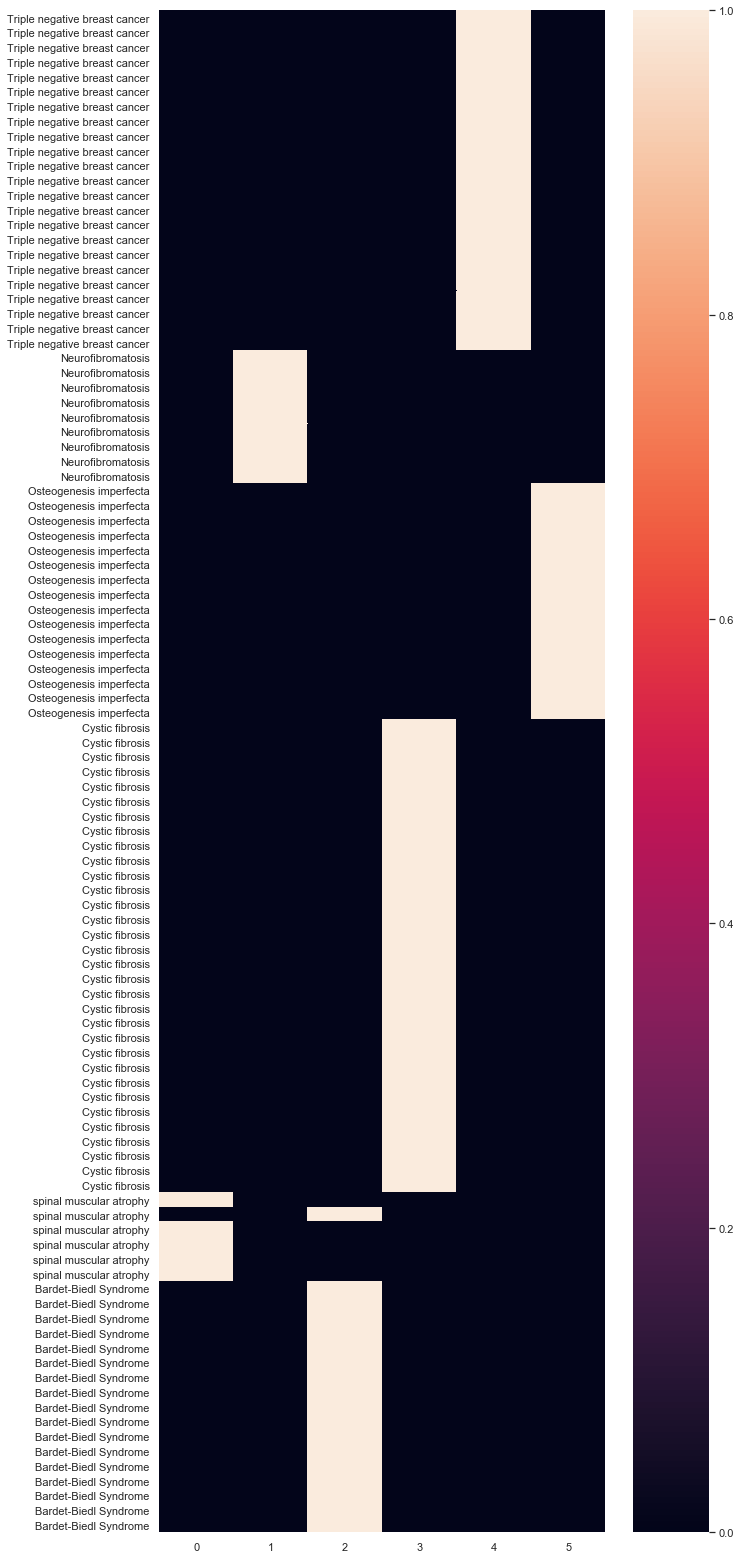

In [22]:
fig, ax = plt.subplots(figsize=(10,28))
ax = sns.heatmap(dtm, vmin=0, vmax=1, ax=ax, yticklabels=gold.topic)

# Clustering unlabed abstracts

In [23]:
test_set = pd.read_csv('../data/pmids_test_set_unlabeled.txt', sep='\t',
                             header=None, names=['pmid'])
print(test_set.shape)
test_set.head()

(77, 1)


,pmid
0,8001324
1,12598898
2,14707528
3,17047017
4,17487218


In [24]:
articles = fetch_abstracts(test_set.pmid)
len(articles)

77

## Combine title and abstract and vectorize

In [25]:
texts = [a.title + ' ' + a.abstract for a in articles]

In [26]:
vectorizer = TfidfVectorizer(max_df=0.66,
                             max_features=1000,
                             min_df=2,
                             stop_words='english')
X = vectorizer.fit_transform(texts)

In [27]:
X.shape

(77, 1000)

## Guess k using silhouette score

In [28]:
sil = []
params = [(k,i) for k in range(2,10) for i in range(7)]

for k,i in tqdm(params):
    km = KMeans(n_clusters=k,
                init='random',
                max_iter=100,
                n_init=20,
                verbose=False)
    km.fit(X)
    sil.append([k, metrics.silhouette_score(X, km.labels_, sample_size=1000)])

df_sil = pd.DataFrame(sil)

100%|██████████| 56/56 [00:28<00:00,  2.43it/s]


In [29]:
df_sil = pd.DataFrame(sil, columns=['k', 'sil'])

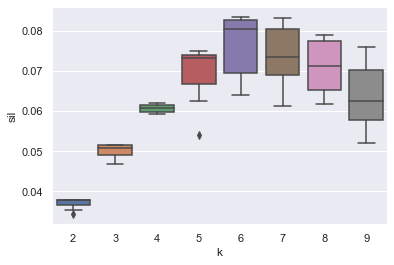

In [30]:
ax = sns.boxplot(x='k', y='sil', data=df_sil)

Judging by the inflection point, the true k is probably around 5.

## k-means clustering

In [31]:
k = 5
km = KMeans(n_clusters=k,
            init='random',
            max_iter=100,
            n_init=20,
            verbose=True)
km.fit(X)

Initialization complete
Iteration  0, inertia 120.577
Iteration  1, inertia 63.583
Iteration  2, inertia 63.023
Iteration  3, inertia 62.817
Iteration  4, inertia 62.705
Iteration  5, inertia 62.602
Iteration  6, inertia 62.467
Iteration  7, inertia 62.057
Iteration  8, inertia 61.860
Iteration  9, inertia 61.542
Converged at iteration 9: center shift 0.000000e+00 within tolerance 9.211090e-08
Initialization complete
Iteration  0, inertia 122.800
Iteration  1, inertia 61.429
Iteration  2, inertia 60.431
Iteration  3, inertia 59.583
Iteration  4, inertia 59.254
Converged at iteration 4: center shift 0.000000e+00 within tolerance 9.211090e-08
Initialization complete
Iteration  0, inertia 120.957
Iteration  1, inertia 62.930
Iteration  2, inertia 62.022
Iteration  3, inertia 61.053
Iteration  4, inertia 60.669
Converged at iteration 4: center shift 0.000000e+00 within tolerance 9.211090e-08
Initialization complete
Iteration  0, inertia 119.802
Iteration  1, inertia 64.142
Iteration  2, in

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=5,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=True)

In [32]:
metrics.silhouette_score(X, km.labels_, sample_size=1000)

0.07002007202536062

## find top 10 words by tf-idf in each cluster

In [37]:
def top(a, k=10):
    return heapq.nlargest(k, range(len(a)), a.take)

In [39]:
topic_labels = {}
for ki in range(k):
    m = X[km.labels_==ki].sum(axis=0)
    top_words = [vectorizer.get_feature_names()[i] 
                     for i in top(np.squeeze(np.asarray(m)), 10)]
    print(ki, ', '.join(top_words), '\n')
    topic_labels[ki] = top_words[0]

0 turner, ts, patients, girls, women, chromosome, risk, thyroid, liver, stature 

1 lung, adenocarcinoma, survival, luad, stage, expression, cancer, classification, overall, prognostic 

2 lynch, colorectal, cancer, mmr, msi, cancers, studies, hereditary, mfs, hnpcc 

3 marfan, aortic, mfs, tissue, patients, clinical, connective, tgf, fbn1, cardiovascular 

4 noonan, nipbl, cdls, like, cases, ns, report, mutations, gene, pain 



In [40]:
topic_labels

{0: 'turner', 1: 'lung', 2: 'lynch', 3: 'marfan', 4: 'noonan'}

In [44]:
df = pd.DataFrame(dict(pmid=[a.pmid for a in articles],
                  km_label=[topic_labels[t] for t in km.labels_]))
df

,pmid,km_label
0,8001324,noonan
1,12598898,marfan
2,14707528,lynch
3,17047017,turner
4,17487218,marfan
5,17708142,turner
6,20351703,marfan
7,20578946,noonan
8,21263000,noonan
9,21706501,noonan


In [45]:
df.to_csv('../data/kmeans_output_test.tsv', index=False, sep='\t')